# Goals

Tag study, grant and dataType


In [181]:
# setup
import pandas as pd
import numpy as np
import re
from datetime import datetime
import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path + "/scripts")

import ontologyScraper as ont
import textcleaning as tc

In [182]:
# just for dev
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [183]:
# read in raw data from snowflake
df = pd.read_csv("../data/portal-data-raw-20231214.csv", low_memory=False, index_col=0)

In [184]:
# # potential features
df = df.loc[
    :,
    [
        "ID",
        "TABLE",
        "TYPE",
        "NAME",
        "STUDY",
        "ASSAY",
        "DATATYPE",
        "DATASUBTYPE",
        "RESOURCETYPE",
        "FILEFORMAT",
        "GRANTS",
        "PARENTID",
        "PROJECTID",
        "STUDYID",
        "PROJECT",
        "CONTRIBUTOR",
        "PI",
    ],
]


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524392 entries, 0 to 524391
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            519340 non-null  object
 1   TABLE         524392 non-null  object
 2   TYPE          222172 non-null  object
 3   NAME          519340 non-null  object
 4   STUDY         286613 non-null  object
 5   ASSAY         335741 non-null  object
 6   DATATYPE      334951 non-null  object
 7   DATASUBTYPE   224916 non-null  object
 8   RESOURCETYPE  268279 non-null  object
 9   FILEFORMAT    337821 non-null  object
 10  GRANTS        233913 non-null  object
 11  PARENTID      514772 non-null  object
 12  PROJECTID     448049 non-null  object
 13  STUDYID       166124 non-null  object
 14  PROJECT       5540 non-null    object
 15  CONTRIBUTOR   41095 non-null   object
 16  PI            11609 non-null   object
dtypes: object(17)
memory usage: 72.0+ MB


In [186]:
# cols that are lists represented as strings. 

list_cols = ["STUDY", "DATATYPE", "ASSAY", "GRANTS"]
for l in list_cols: 
    try: 
        df[l] = df[l].str.replace('\n|\[|\]|"', "", regex=True).str.strip()
    except Exception as e: 
        print(e)

# fill in empty cells with nan's
df = df.replace("", np.nan)
df = df.replace("undefined", np.nan)
df = df.replace("\t", " ", regex=False)

In [187]:
df.sample(20)

,ID,TABLE,TYPE,NAME,STUDY,ASSAY,DATATYPE,DATASUBTYPE,RESOURCETYPE,FILEFORMAT,GRANTS,PARENTID,PROJECTID,STUDYID,PROJECT,CONTRIBUTOR,PI
378310,syn39239278,SAGE.PORTAL_RAW.NF,file,up-pressed.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn39224867,syn9727752,syn9727752,NaN,NaN,NaN
390941,syn43124341,SAGE.PORTAL_RAW.NF,file,1.2.840.113619.2.135.2025.3762954.5184.1151837...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn43124274,syn17098100,syn17098100,NaN,NaN,NaN
134189,syn25954426,SAGE.PORTAL_RAW.AD,NaN,VL.s23.r1.fq.gz,ROSMAP-IN,rnaSeq,geneExpression,raw,experimentalData,fastq,R01AG055909,syn26126220,syn2580853,NaN,NaN,NaN,NaN
182268,syn36298623,SAGE.PORTAL_RAW.AD,NaN,F5-3_GACCTGAA-TTGGTGAG_H5Y2GDSXY_L004_001.R1.f...,BCM-DMAS,rnaSeq,geneExpression,raw,experimentalData,fastq,"U01AG046161,U01AG061357,R01AG057339",syn42570486,syn2580853,NaN,NaN,NaN,NaN
16896,syn7391316,SAGE.PORTAL_RAW.AD,NaN,5821203011_R06C02_1-Swath1_Grn.jpg,ROSMAP,methylationArray,epigenetics,raw,experimentalData,jpg,U01AG046152,syn7390515,syn2580853,NaN,NaN,NaN,NaN
163632,syn29957889,SAGE.PORTAL_RAW.AD,NaN,LBPSEMA4BRAIN157_run1_S64_L002_R1_001.fastq.gz,LBP,rnaSeq,geneExpression,raw,experimentalData,fastq,GCO18-0632,syn27127036,syn2580853,NaN,NaN,NaN,NaN
106061,syn20783803,SAGE.PORTAL_RAW.AD,NaN,369_8mo_ThioS-GFAP-S100B,UCI_5XFAD,immunofluorescence,immunoassay,raw,experimentalData,czi,U54AG054349,syn20710993,syn2580853,NaN,NaN,NaN,NaN
347643,syn38869082,SAGE.PORTAL_RAW.NF,folder,SU46C9G2.ballgown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn38868952,syn32909874,NaN,NaN,NaN,NaN
132734,syn25872201,SAGE.PORTAL_RAW.AD,NaN,Hippocampus_4639_R2.fastq.gz,UCI_PrimaryScreen,rnaSeq,geneExpression,raw,experimentalData,fastq,U54AG054349,syn25316716,syn2580853,NaN,NaN,NaN,NaN
440799,syn52055921,SAGE.PORTAL_RAW.NF,file,Transcriptcoveragehistogram.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn52053250,syn51907739,syn51907739,NaN,NaN,NaN


# EDA


In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

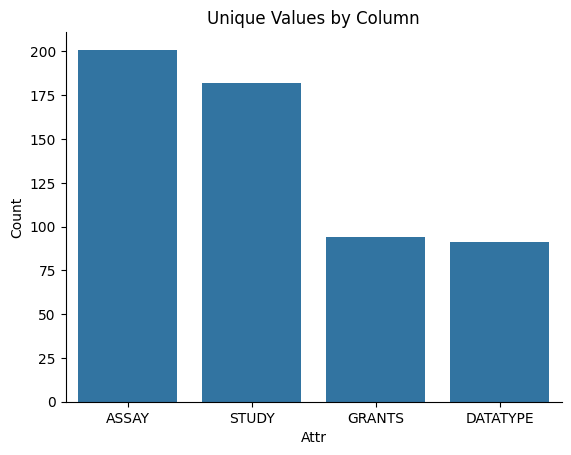

In [189]:
# unique values by column
unique_counts = df[list_cols].fillna("").apply(lambda x: len(np.unique(x)))
unique_counts = (
    pd.DataFrame(unique_counts)
    .reset_index()
    .rename(columns={"index": "Attr", 0: "Count"})
)
sns.barplot(unique_counts.sort_values(
    "Count", ascending=False), x="Attr", y="Count").set(title="Unique Values by Column")

sns.despine()

/var/folders/p0/5m4pdsm55jn_d5nzbjv6bjf40000gq/T/ipykernel_63329/3986323795.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


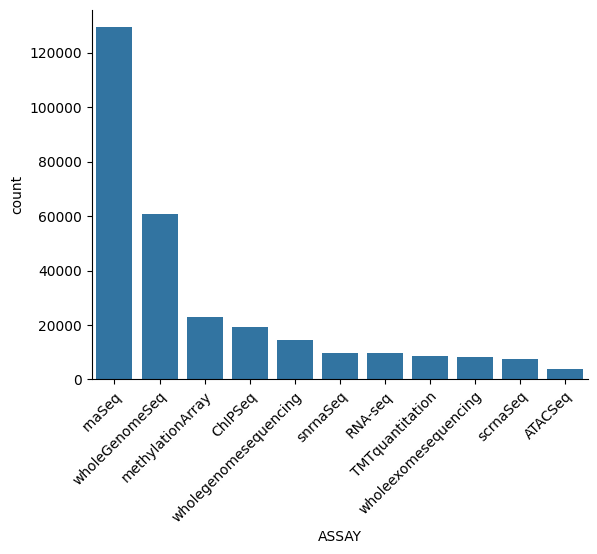

In [190]:
# similar labels
assay_counts = (
    pd.DataFrame(df["ASSAY"].value_counts())
    .reset_index()
    .rename(columns={"index": "ASSAY", "ASSAY": "count"})
)

g = sns.barplot(x="ASSAY", y="count", data=assay_counts.loc[:10, :])

g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

sns.despine()

plt.show()

In [191]:
# Missing annotations

# Cleanup Attributes


In [192]:
# get spelling from public ontology source for assay
# vv_assay = ont.purl_main(
#     "http://purl.obolibrary.org/obo/OBI_0000070")
# vv_assay = pd.Series(vv_assay)
# vv_assay.to_csv('./data/valid_values_assay.csv')

vv_assay = (
    pd.read_csv("../data/valid_values_assay.csv")
    .drop(columns="Unnamed: 0")
    .rename(columns={"0": "values"})
)

vv_assay["values"] = vv_assay["values"].replace('assay', '', regex = True)

In [193]:
# manually recode
assay_recoder = {
    "(?i)3D\s*Confocal\s*Imaging": "3D confocal imaging",
    "(?i)active\s*avoidance\s*learning\s*behavior": "active avoidance learning behavior",
    "(?i)ATAC-*seq": "ATAC-seq",
    "(?i)(err)?bisulfite\s*seq(uencing)?": "bisulfite sequencing",
    "(?i)Blood\s*Chemistry\s*Measurement": "blood chemistry measurement",
    "cell\s*proliferation": "cell proliferation",
    "(?i)ChIP-*Seq": "ChIP-seq",
    "contextual\s*conditioning\s*behavior": "contextual conditioning behavior",
    "(?i)electrophysiology": "electrophysiology",
    "exomeSeq": "whole exome sequencing",
    "(?i)flow\s*cytometry": "flow cytometry",
    "(?i)Genotyping": "genotyping",
    "(?i)Immunoprecipitation": "immunoprecipitation",
    "liquid\s*chromatography/tandem\s*mass\s*spectrometry": "liquid chromatography-tandem mass spectrometry",
    "liquidchromatography/tandemmassspectrometry": "liquid chromatography-tandem mass spectrometry",
    "localfieldpotentialrecording": "local field potential recording",
    "(?i)mass\s*spectrometry": "mass spectrometry",
    "(?i)methylationArray": "methylation array",
    "microscopy": "microscopy",
    "novelty\s*response\s*behavior": "novelty response behavior",
    "photography": "photograph",
    "(?i)polymerase\s*chain\s*reaction": "polymerase chain reaction",
    "(?i)Positron\s*Emission\s*Tomography": "positron emission tomography imaging",
    "(?i)positronemissiontomography": "positron emission tomography imaging",
    "(?i)proximityextensionassay": "proximity extension",
    "HI-C": "Hi-C",
    "(?i)RNA-*\s*seq": "RNA-seq",
    "(?i)rnaArray": "RNA array",
    "(?i)scATAC-*seq\s*(assay)?": "single-cell ATAC-seq",
    "(?i)scRNA-*seq\s*assay": "single-cell RNA-seq",
    "scwholeGenomeSeq": "single-cell whole genome sequencing",
    "sorbitoldehydrogenaseactivitylevelassay": "sorbitol dehydrogenase activity level",
    "(?i)single-*cell\s*RNA-seq\s*(assay)?": "single-cell RNA-seq",
    "(?i)snATAC-*seq\s*(assay)?": "single-nucleus ATAC-seq",
    "(?i)snRNA-?seq assay": "single-nucleus RNA-seq",
    "(?i)snpArray": "SNParray",
    "(?i)T\s*cell\s*receptor\s*repertoire\s*sequencing": "T cell receptor repertoire sequencing",
    "(?i)TMT\s*quantitation": "TMT quantitation",
    "TMT\s*quantification": "TMT quantitation",
    "(?i)western\s*blot": "western blot",
    "(?i)Whole\s*Exome\s*Seq(uencing)?": "whole exome sequencing",
    "(?i)whole\s*genome\s*seq(uencing)?": "whole genome sequencing",
    "whole-cell\s*patch\s*clamp": "whole-cell patch clamp",
}

In [194]:
# for reordering if necessary
k = assay_recoder.keys()
k = sorted(k, key=str.casefold)
for ki in k:
    print('"' + ki + '"' + ":" + '"' + assay_recoder[ki] + '"' + ",")

"(?i)(err)?bisulfite\s*seq(uencing)?":"bisulfite sequencing",
"(?i)3D\s*Confocal\s*Imaging":"3D confocal imaging",
"(?i)active\s*avoidance\s*learning\s*behavior":"active avoidance learning behavior",
"(?i)ATAC-*seq":"ATAC-seq",
"(?i)Blood\s*Chemistry\s*Measurement":"blood chemistry measurement",
"(?i)ChIP-*Seq":"ChIP-seq",
"(?i)electrophysiology":"electrophysiology",
"(?i)flow\s*cytometry":"flow cytometry",
"(?i)Genotyping":"genotyping",
"(?i)Immunoprecipitation":"immunoprecipitation",
"(?i)mass\s*spectrometry":"mass spectrometry",
"(?i)methylationArray":"methylation array",
"(?i)polymerase\s*chain\s*reaction":"polymerase chain reaction",
"(?i)Positron\s*Emission\s*Tomography":"positron emission tomography imaging",
"(?i)positronemissiontomography":"positron emission tomography imaging",
"(?i)proximityextensionassay":"proximity extension",
"(?i)RNA-*\s*seq":"RNA-seq",
"(?i)rnaArray":"RNA array",
"(?i)scATAC-*seq\s*(assay)?":"single-cell ATAC-seq",
"(?i)scRNA-*seq\s*assay":"single-cell 

In [195]:
df = df.replace("\t", " ", regex=True)

In [196]:
# fuzzy matching to self
col_recode = "ASSAY"

# A good cut off is 95, otherwise similar but not exact matches arise like whole exome sequencing versus whome genome sequencing
df[col_recode] = df[col_recode].replace(assay_recoder, regex=True)
df[col_recode] = df[col_recode].replace('assay', '', regex = True)

In [197]:
results = tc.fuzzy_matcher(
    df[col_recode], df[col_recode].fillna("").unique(), 90)

results["antCount"] = results["Annotation"].apply(
    lambda x: len(df[df[col_recode] == x])
)

with pd.option_context("display.max_rows", None):
    display(results)

# take the annotation with the best score match
idx = results.groupby("Annotation")["Score"].idxmax()

max_scores = (
    results.loc[idx]
    .sort_values(
        by=["Annotation", "Score"],
        key=lambda x: x.str.lower() if pd.api.types.is_string_dtype(x.dtype) else x,
    )
    .reset_index(drop=True)
)

# Works for most but not for example "whole exome sequencing" which matches to "whole genome sequencing assay" instead of "exome sequencing assay"

for k, v in assay_recoder.items():
    max_scores.loc[max_scores["Annotation"] == k, "ontologyWord"] = v

# max_scores

,Annotation,ontologyWord,Score,antCount
0,electrochemiluminescence,"electrochemiluminescence,SiMoA",92,18
1,RNA-seq,scRNA-seq,92,139276
2,RNA-seq,snRNA-seq,92,139276
3,"RNA-seq,TMT quantitation,whole genome sequencing","TMT quantitation,whole genome sequencing",93,1
4,whole exome sequencing,whole genome sequencing,93,8937


In [198]:
# fuzzy matching to ontology
col_recode = "ASSAY"

# A good cut off is 95, otherwise similar but not exact matches arise
results = tc.fuzzy_matcher(df[col_recode], vv_assay["values"], 90)
results["antCount"] = results["Annotation"].apply(
    lambda x: len(df[df[col_recode] == x])
)

with pd.option_context("display.max_rows", None):
    display(results)

,Annotation,ontologyWord,Score,antCount
0,bisulfite sequencing,bisulfite sequencing,98,992
1,cell proliferation,cell proliferation,97,14
2,cellviability,cell viability,93,2133
3,ChIP-seq,ChIP-seq,93,19205
4,electrophysiology,electrophysiology,97,13
5,flow cytometry,flow cytometry,97,27
6,genotyping,genotyping,95,19
7,immunoprecipitation,immunoprecipitation,97,2
8,liquid chromatography-tandem mass spectrometry,liquid chromatography mass spectrometry,92,10
9,mass spectrometry,mass spectrometry,97,52


In [199]:
sorted(df['ASSAY'].dropna().unique(),key=str.casefold)

['10xmultiome',
 '16SrRNA-seq',
 '2DAlamarBluefluorescence',
 '2DCellTiter-Glo',
 '2DIncucyte',
 '3D confocal imaging',
 '3Delectronmicroscopy',
 '3Dimaging',
 '3Dmicrotissueviability',
 'active avoidance learning behavior',
 'anxiety-relatedbehavior',
 'array',
 'ATAC-seq',
 'atomicforcemicroscopy',
 'ATPaseactivity',
 'autoradiography',
 'BakerLipidomics',
 'BiocratesBileAcids',
 'BiocratesBileAcids,Biocratesp180,Metabolon',
 'Biocratesp180',
 'bisulfite sequencing',
 'blood chemistry measurement',
 'bluenativePAGE',
 'bodysizetraitmeasurement',
 'brightfieldmicroscopy',
 'calciumretentioncapacity',
 'cAMP-GloMaxAssay',
 'cell proliferation',
 'cellcompetition',
 'cellcount',
 'cellviability',
 "Children'sDermatologyLifeQualityIndexQuestionnaire",
 'ChIP-seq',
 'CITESeq',
 'clinicaldata',
 'cNF-Skindex',
 'Confocalimaging',
 'confocalmicroscopy',
 'contextual conditioning behavior',
 'conventionalMRI',
 'CUT&RUN',
 'drugscreen',
 'electrochemiluminescence',
 'electrochemiluminescence

/var/folders/p0/5m4pdsm55jn_d5nzbjv6bjf40000gq/T/ipykernel_63329/3225533118.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


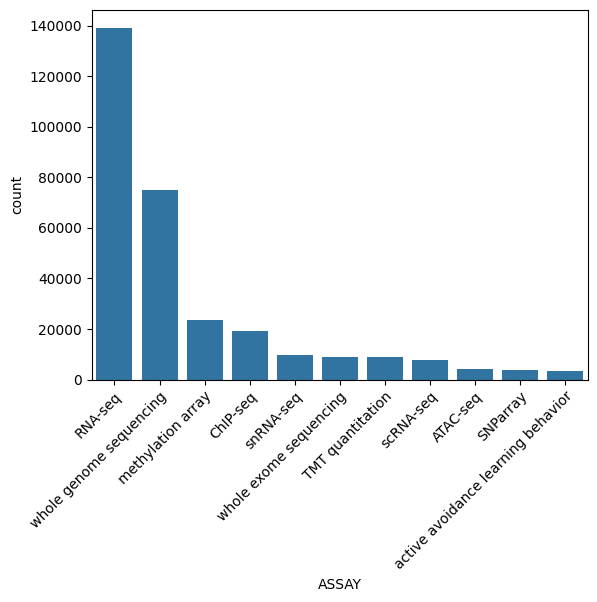

In [200]:
# similar labels
assay_counts = (
    pd.DataFrame(df["ASSAY"].value_counts())
    .reset_index()
    .rename(columns={"index": "ASSAY", "ASSAY": "count"})
)

g = sns.barplot(x="ASSAY", y="count", data=assay_counts.loc[:10, :])

g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()

In [201]:
assay_counts.iloc[:20, :]

,ASSAY,count
0,RNA-seq,139276
1,whole genome sequencing,75046
2,methylation array,23600
3,ChIP-seq,19205
4,snRNA-seq,9839
5,whole exome sequencing,8937
6,TMT quantitation,8912
7,scRNA-seq,7683
8,ATAC-seq,4290
9,SNParray,3643


Fix studies


In [202]:
DATATYPE_recoder = {"Analysis": "analysis", "Volume": "volume"}

# fix data type
sorted(df["DATATYPE"].fillna("").unique(), key=str.casefold)

df["DATATYPE"] = df["DATATYPE"].replace(DATATYPE_recoder)

In [203]:
# fix resourceType
fix_col = "RESOURCETYPE"

recoder = {"ExperimentalData": "experimentalData", " tool": "tool"}

# fix col type
sorted(df[fix_col].fillna("").unique(), key=str.casefold)

df[fix_col] = df[fix_col].replace(recoder)

In [204]:
# fix resourceType
fix_col = "DATASUBTYPE"

recoder = {"ExperimentalData": "experimentalData", " tool": "tool"}

# fix data type
sorted(df[fix_col].fillna("").unique(), key=str.casefold)

# df[fix_col] = df[fix_col].replace(recoder)

['',
 'bundle',
 'clinical',
 'CopyNumberSegments',
 'dataMatrix',
 'md5',
 'metadata',
 'normalized',
 'preprocessed',
 'processed',
 'raw',
 'raw,processed',
 'report',
 'representative',
 'residualized',
 'SNPvariants',
 'structuralvariants']

In [205]:
# fix resourceType
fix_col = "FILEFORMAT"

recoder = {
    "(?i)bash\s*script": "sh",
    "R script": "R",
    "(?i)synapse\s*Table": "SynapseTable",
    "(?i)Python\s*script": "py",
    "Fastq": "fastq",
    "(?i)powerpoint": "ppt",
    "(?i)RData": "Rdata",
}

df[fix_col] = df[fix_col].replace(recoder, regex=True)

# fix data type
print(sorted(df[fix_col].fillna("").unique(), key=str.casefold))

['', '7z', 'AB1', 'abf', 'ai', 'avi', 'bai', 'bam', 'bat', 'bed', 'bedbroadPeak', 'bedgappedPeak', 'bedgraph', 'bednarrowPeak', 'bgzip', 'bias', 'bigwig', 'bim', 'bpm', 'bsc', 'cel', 'cfg', 'chp', 'cnn', 'cnr', 'cns', 'config', 'cov', 'crai', 'cram', 'csi', 'css', 'csv', 'ctab', 'czi', 'dat', 'db', 'DICOM', 'dict', 'doc', 'docx', 'excel', 'fai', 'fam', 'fasta', 'fastq', 'fcs', 'feather', 'flagstat', 'gct', 'gif', 'gmt', 'gtf', 'gz', 'gzip', 'h5ad', 'hdf', 'hdf5', 'hic', 'html', 'hyperlink', 'idat', 'idx', 'idxstats', 'jpg', 'js', 'json', 'locs', 'log', 'maf', 'matrix', 'md5', 'mov', 'mp4', 'msf', 'mtx', 'mzML', 'nii', 'out', 'pdf', 'pdresult', 'pdstudy', 'pdview', 'pepXML', 'plink', 'png', 'ppt', 'py', 'pzf', 'pzfx', 'R', 'raw', 'RCC', 'Rdata', 'rds', 'recal', 'RLF', 'Rscript', 'saf', 'sdf', 'seg', 'Sentrixdescriptorfile', 'SEQ', 'sf', 'sf3', 'sh', 'sqlite', 'stats', 'svg', 'svs', 'SynapseTable', 'tab', 'tagAlign', 'talon', 'tar', 'tbi', 'tif', 'tom', 'tranches', 'tsv', 'txt', 'vcf', '

In [206]:
df['FILEFORMAT'] = df['FILEFORMAT'].replace('', np.nan).str.lower()

In [207]:
# file formats
# file_formats = ont.purl_main('http://edamontology.org/format_1915')
# pd.Series(file_formats).to_csv('./data/file-formats.csv', index = False)
file_formats = pd.read_csv("../data/file-formats.csv").rename(columns={"0": "values"})

file_formats["values"] = file_formats["values"].str.replace("format", "")
# get as an array
file_formats = list(file_formats["values"].values)

new_terms = [
    "txt",
    "mzXML",
    "mds",
    "sf3",
    "tbz",
    "drv",
    "crai",
    "dbm",
    "svs",
    "svg",
    "tmp",
    "unr",
    "gmt",
    "R",
    "Rmd",
    "Rdata",
    "fam",
    "gz",
    "h5",
    "hdr",
    "img",
    "tgz",
    "XSL",
    "XLS",
    "zip",
    "seq",
    "rtf",
    "sh",
    "doc",
    "bgz",
    "bib",
    "ipynb",
    "py",
    "xlsb",
    "qc"
]

file_formats += new_terms + list(df["FILEFORMAT"].dropna().values)

file_formats = sorted(np.unique(file_formats), key=lambda x: x.lower())

In [208]:
file_formats

['.nib',
 '2bit',
 '3D-1D scoring matrix ',
 '7z',
 'A2M',
 'aaindex',
 'AB1',
 'ab1',
 'ABCD ',
 'abf',
 'ABI',
 'ACE',
 'acedb',
 'affymetrix',
 'affymetrix-exp',
 'afg',
 'AGP',
 'ai',
 'Alignment ',
 'Alignment  (pair only)',
 'Alignment  (text)',
 'Alignment  (XML)',
 'AMBER frcmod',
 'AMBER off',
 'AMBER top',
 'ambiguous',
 'Amino acid index ',
 'Annotated text ',
 'ARB',
 'arff',
 'Article ',
 'ASN.1 sequence ',
 'AVI',
 'avi',
 'axt',
 'BAI',
 'bai',
 'BAM',
 'bam',
 'bat',
 'BCF',
 'BcForms',
 'BCML',
 'BDML',
 'BEAST',
 'BED',
 'bed',
 'bed12',
 'bed6',
 'bedbroadpeak',
 'bedgappedpeak',
 'bedgraph',
 'bednarrowpeak',
 'bedstrict',
 'BEL',
 'bgz',
 'bgzip',
 'bias',
 'bib',
 'Bibliographic reference ',
 'bigBed',
 'bigWig',
 'bigwig',
 'bim',
 'Binary ',
 'BinPos',
 'BioC',
 'Biodiversity data ',
 'BioJSON (BioXSD)',
 'BioJSON (Jalview)',
 'Biological pathway or network ',
 'Biological pathway or network report ',
 'BIOM ',
 'BioNLP Shared Task ',
 'BioPAX',
 'BioXSD (XML)',

In [209]:
df['FILEFORMAT'].unique()

array(['txt', 'tsv', 'plink', 'raw', 'csv', 'fasta', 'pdf', 'cov', 'sh',
       'gct', 'bam', 'fastq', 'docx', 'cel', 'xml', 'bai', 'ppt',
       'rscript', 'sentrixdescriptorfile', 'jpg', 'idat', 'cfg', 'locs',
       'bpm', 'db', 'abf', 'dat', 'vcf', 'config', 'zip', 'excel', 'py',
       'html', 'doc', nan, 'tar', 'mp4', 'rcc', 'rlf', 'rdata', 'gz',
       'mtx', 'avi', 'xlsx', 'r', 'czi', 'pdresult', 'pdview', 'msf',
       'pdstudy', 'pepxml', 'hdf', 'png', 'gzip', 'bed', 'bim', 'fam',
       'tbi', 'yaml', 'crai', 'cram', 'idx', 'bigwig', 'hyperlink', 'saf',
       'bsc', 'talon', 'synapsetable', 'gtf', 'maf', 'hdf5', 'chp', 'seg',
       '7z', 'bgzip', 'sdf', 'gmt', 'sqlite', 'mov', 'pzfx', 'md5', 'rds',
       'svg', 'tif', 'ai', 'svs', 'sf', 'tranches', 'recal', 'log', 'pzf',
       'bat', 'feather', 'dicom', 'ab1', 'seq', 'mzml', 'nii', 'word',
       'fai', 'dict', 'out', 'js', 'css', 'gif', 'json', 'tab',
       'flagstat', 'stats', 'idxstats', 'ctab', 'tom', 'csi', 'fcs',


In [210]:
np.sum(df["FILEFORMAT"].isna())

186571

In [211]:
df["ISZIPPED"] = df["NAME"].str.contains("gz|zip|gzip", na=False, regex = True)

In [212]:
df[df['ISZIPPED']]

,ID,TABLE,TYPE,NAME,STUDY,ASSAY,DATATYPE,DATASUBTYPE,RESOURCETYPE,FILEFORMAT,GRANTS,PARENTID,PROJECTID,STUDYID,PROJECT,CONTRIBUTOR,PI,ISZIPPED
0,syn2426151,SAGE.PORTAL_RAW.AD,NaN,chr1.chop.dosage.gz,ROSMAP,SNParray,genomicVariants,processed,analysis,txt,U01AG046152,syn2426141,syn2580853,NaN,NaN,NaN,NaN,True
1,syn2426152,SAGE.PORTAL_RAW.AD,NaN,chr2.chop.dosage.gz,ROSMAP,SNParray,genomicVariants,processed,analysis,txt,U01AG046152,syn2426141,syn2580853,NaN,NaN,NaN,NaN,True
2,syn2426153,SAGE.PORTAL_RAW.AD,NaN,chr4.chop.dosage.gz,ROSMAP,SNParray,genomicVariants,processed,analysis,txt,U01AG046152,syn2426141,syn2580853,NaN,NaN,NaN,NaN,True
3,syn2426154,SAGE.PORTAL_RAW.AD,NaN,chr8.chop.dosage.gz,ROSMAP,SNParray,genomicVariants,processed,analysis,txt,U01AG046152,syn2426141,syn2580853,NaN,NaN,NaN,NaN,True
4,syn2426155,SAGE.PORTAL_RAW.AD,NaN,chr9.chop.dosage.gz,ROSMAP,SNParray,genomicVariants,processed,analysis,txt,U01AG046152,syn2426141,syn2580853,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524374,syn26347224,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,mi2015_896_r_S3_R1_001.fastq.gz,BrainGVEX,miRNA-seq,geneExpression,raw,experimentalData,fastq,U01MH103340,syn26379976,NaN,NaN,NaN,NaN,NaN,True
524375,syn26347226,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,mi2015_1453_r_S17_R1_001.fastq.gz,BrainGVEX,miRNA-seq,geneExpression,raw,experimentalData,fastq,U01MH103340,syn26379976,NaN,NaN,NaN,NaN,NaN,True
524376,syn26347228,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,mi2015_918_S14_R1_001.fastq.gz,BrainGVEX,miRNA-seq,geneExpression,raw,experimentalData,fastq,U01MH103340,syn26379976,NaN,NaN,NaN,NaN,NaN,True
524384,syn26453724,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,SL424495_GSLv5-8_i7_45.merge.fastq.gz,BrainTF,ChIP-seq,chromatinActivity,raw,experimentalData,fastq,R01MH110472,syn26452566,NaN,NaN,NaN,NaN,NaN,True


In [213]:
temp = df.loc[df['FILEFORMAT'].isna(), "NAME"].str.replace(r".gz", "", regex=False).str.rsplit(r".", 1, expand=True)

/var/folders/p0/5m4pdsm55jn_d5nzbjv6bjf40000gq/T/ipykernel_63329/2429385059.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  temp = df.loc[df['FILEFORMAT'].isna(), "NAME"].str.replace(r".gz", "", regex=False).str.rsplit(r".", 1, expand=True)


In [214]:
print(f"Before: {np.sum(df['FILEFORMAT'].isna())}")

df['FILEFORMAT'] = df['FILEFORMAT'].fillna(temp.loc[temp[1].str.lower().isin([f.lower() for f in file_formats])][1])

print(f"After: {np.sum(df['FILEFORMAT'].isna())}")

Before: 186571
After: 65041


In [215]:
sorted(df["FILEFORMAT"].dropna().unique(), key = lambda x: x.lower())

['7z',
 'ab1',
 'abf',
 'ai',
 'avi',
 'bai',
 'bam',
 'BAM',
 'bat',
 'bed',
 'BED',
 'bedbroadpeak',
 'bedgappedpeak',
 'bedgraph',
 'BedGraph',
 'bednarrowpeak',
 'bgzip',
 'bias',
 'bib',
 'bigwig',
 'bigWig',
 'bim',
 'bmp',
 'bpm',
 'bsc',
 'cel',
 'cfg',
 'chp',
 'cnn',
 'cnr',
 'cns',
 'config',
 'cov',
 'crai',
 'cram',
 'csi',
 'css',
 'csv',
 'ctab',
 'czi',
 'dat',
 'db',
 'dbm',
 'dicom',
 'dict',
 'dna',
 'doc',
 'docx',
 'DOCX',
 'excel',
 'fai',
 'fam',
 'fasta',
 'fastq',
 'fcs',
 'feather',
 'flagstat',
 'gct',
 'gif',
 'gmt',
 'gtf',
 'gz',
 'gzip',
 'h5',
 'h5ad',
 'hdf',
 'hdf5',
 'hdr',
 'hic',
 'html',
 'hyperlink',
 'idat',
 'idx',
 'idxstats',
 'img',
 'ipynb',
 'jpg',
 'JPG',
 'js',
 'json',
 'locs',
 'log',
 'lsm',
 'maf',
 'map',
 'mat',
 'matrix',
 'md5',
 'mds',
 'mov',
 'mp4',
 'msf',
 'mtx',
 'mzML',
 'mzml',
 'nii',
 'out',
 'pdf',
 'PDF',
 'pdresult',
 'pdstudy',
 'pdview',
 'ped',
 'pepxml',
 'pickle',
 'pileup',
 'plink',
 'png',
 'PNG',
 'ppt',
 'pp

In [216]:
np.sum(df["FILEFORMAT"].isna())

65041

In [217]:
with pd.option_context('display.max_colwidth', None):
    display(df.loc[df["FILEFORMAT"].isna(), ['ID','NAME', 'TYPE', 'FILEFORMAT', 'ISZIPPED']])

,ID,NAME,TYPE,FILEFORMAT,ISZIPPED
105905,syn20485026,RaderLabLipidsCADALZADNI1,NaN,NaN,False
105906,syn20485032,RaderLabADNI1LipidsCADALZDictionary,NaN,NaN,False
105916,syn20680575,MetabolomicAnalysisGCTOFData,NaN,NaN,False
105917,syn20680576,MetabolomicAnalysisGCTOFMethods(PDF),NaN,NaN,False
105918,syn20680577,MetabolomicAnalysisGCTOFDataDictionary,NaN,NaN,False
...,...,...,...,...,...
506373,syn11535149,H3K27ac.PFC.HBCC.homogenate.0.1.SE.nomodel_broadPeak,NaN,NaN,False
506374,syn11535183,Consolidated_H3K4me3_PFC_HBCC_Homogenate,NaN,NaN,False
506379,syn11535377,Consolidated_H3K27ac_PFC_HBCC_Homogenate,NaN,NaN,False
517624,syn18915911,ClinicalDataMap,NaN,NaN,False


# cleanup "types"


In [218]:
df.loc[
    df["NAME"].str.contains("Dictionary", flags=re.IGNORECASE, na = False), "METADATATYPE"
] = "dataDictionary"

In [219]:
df.loc[
    (df["NAME"].str.contains("metadata", flags=re.IGNORECASE, na = False))
    & (df["RESOURCETYPE"].isnull())
    & (~df["FILEFORMAT"].isin(["py", "ipynb"])),
    "RESOURCETYPE",
] = "metadata"

In [220]:
df.loc[
    (df["NAME"].str.contains("metadata", flags=re.IGNORECASE, na = False))
    & (df["RESOURCETYPE"].isnull()),
]

,ID,TABLE,TYPE,NAME,STUDY,ASSAY,DATATYPE,DATASUBTYPE,RESOURCETYPE,FILEFORMAT,GRANTS,PARENTID,PROJECTID,STUDYID,PROJECT,CONTRIBUTOR,PI,ISZIPPED,METADATATYPE
70776,syn17020593,SAGE.PORTAL_RAW.AD,NaN,clinical_metadata_helpers.py,NaN,NaN,NaN,NaN,NaN,py,NaN,syn17020592,syn2580853,NaN,NaN,NaN,NaN,False,NaN
70777,syn17020594,SAGE.PORTAL_RAW.AD,NaN,clinical_metadata_table.ipynb,NaN,NaN,NaN,NaN,NaN,ipynb,NaN,syn17020592,syn2580853,NaN,NaN,NaN,NaN,False,NaN


In [221]:
df.loc[df["DATASUBTYPE"].isnull(),]

,ID,TABLE,TYPE,NAME,STUDY,ASSAY,DATATYPE,DATASUBTYPE,RESOURCETYPE,FILEFORMAT,GRANTS,PARENTID,PROJECTID,STUDYID,PROJECT,CONTRIBUTOR,PI,ISZIPPED,METADATATYPE
24,syn3169023,SAGE.PORTAL_RAW.AD,NaN,AMP-AD_HBTRC_MSSM_Agilent44Karray_PFC_AgeCorre...,HBTRC,RNA array,geneExpression,NaN,experimentalData,tsv,U01AG046170,syn20808200,syn2580853,NaN,NaN,NaN,NaN,False,NaN
25,syn3169026,SAGE.PORTAL_RAW.AD,NaN,AMP-AD_HBTRC_MSSM_Agilent44Karray_Covariates,HBTRC,SNParray,genomicVariants,NaN,metadata,tsv,U01AG046170,syn16944513,syn2580853,NaN,NaN,NaN,NaN,False,NaN
29,syn3173724,SAGE.PORTAL_RAW.AD,NaN,Emory_Emory_LTQOrbitrapXL_ADPD,Emory_ADRC,LC-MSMS,proteomics,NaN,experimentalData,raw,U01AG046161,syn9884385,syn2580853,NaN,NaN,NaN,NaN,False,NaN
30,syn3175294,SAGE.PORTAL_RAW.AD,NaN,Emory_Emory_LTQOrbitrapXL_AD,Emory_ADRC,LC-MSMS,proteomics,NaN,experimentalData,raw,U01AG046161,syn9884385,syn2580853,NaN,NaN,NaN,NaN,False,NaN
31,syn3176449,SAGE.PORTAL_RAW.AD,NaN,Emory_Emory_LTQOrbitrapXL_ALS,Emory_ADRC,LC-MSMS,proteomics,NaN,experimentalData,raw,U01AG046161,syn9884385,syn2580853,NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524386,syn26546326,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,PEC_Sample_template_biospecimen.PNG,NaN,NaN,NaN,NaN,NaN,PNG,NaN,syn26546226,NaN,NaN,NaN,NaN,NaN,False,NaN
524387,syn26546331,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,PEC_Sample_template_manifest.PNG,NaN,NaN,NaN,NaN,NaN,PNG,NaN,syn26546226,NaN,NaN,NaN,NaN,NaN,False,NaN
524388,syn26546334,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,PEC_Sample_template_individual_human_1.PNG,NaN,NaN,NaN,NaN,NaN,PNG,NaN,syn26546226,NaN,NaN,NaN,NaN,NaN,False,NaN
524389,syn26546335,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,PEC_Sample_template_individual_human_2.PNG,NaN,NaN,NaN,NaN,NaN,PNG,NaN,syn26546226,NaN,NaN,NaN,NaN,NaN,False,NaN


In [222]:
# ASSUMING ALL ROWS ARE FILES
df.loc[(~df["FILEFORMAT"].isnull()) & (df["TYPE"].isnull()), "TYPE"] = 'file'

In [223]:
df.loc[df['TYPE'].isnull()]

,ID,TABLE,TYPE,NAME,STUDY,ASSAY,DATATYPE,DATASUBTYPE,RESOURCETYPE,FILEFORMAT,GRANTS,PARENTID,PROJECTID,STUDYID,PROJECT,CONTRIBUTOR,PI,ISZIPPED,METADATATYPE
105905,syn20485026,SAGE.PORTAL_RAW.AD,NaN,RaderLabLipidsCADALZADNI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn20459553,syn2580853,NaN,NaN,NaN,NaN,False,NaN
105906,syn20485032,SAGE.PORTAL_RAW.AD,NaN,RaderLabADNI1LipidsCADALZDictionary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn20459553,syn2580853,NaN,NaN,NaN,NaN,False,dataDictionary
105916,syn20680575,SAGE.PORTAL_RAW.AD,NaN,MetabolomicAnalysisGCTOFData,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn20459314,syn2580853,NaN,NaN,NaN,NaN,False,NaN
105917,syn20680576,SAGE.PORTAL_RAW.AD,NaN,MetabolomicAnalysisGCTOFMethods(PDF),NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn22116565,syn2580853,NaN,NaN,NaN,NaN,False,NaN
105918,syn20680577,SAGE.PORTAL_RAW.AD,NaN,MetabolomicAnalysisGCTOFDataDictionary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn22116565,syn2580853,NaN,NaN,NaN,NaN,False,dataDictionary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506373,syn11535149,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,H3K27ac.PFC.HBCC.homogenate.0.1.SE.nomodel_bro...,EpiMap,NaN,NaN,NaN,NaN,NaN,NaN,syn11532349,NaN,NaN,NaN,NaN,NaN,False,NaN
506374,syn11535183,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,Consolidated_H3K4me3_PFC_HBCC_Homogenate,EpiMap,NaN,NaN,NaN,NaN,NaN,NaN,syn11485497,NaN,NaN,NaN,NaN,NaN,False,NaN
506379,syn11535377,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,Consolidated_H3K27ac_PFC_HBCC_Homogenate,EpiMap,NaN,NaN,NaN,NaN,NaN,NaN,syn11535082,NaN,NaN,NaN,NaN,NaN,False,NaN
517624,syn18915911,SAGE.PORTAL_RAW.PSYCHENCODE,NaN,ClinicalDataMap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,syn21978131,NaN,NaN,NaN,NaN,NaN,False,NaN


In [224]:
df.to_csv(f"../data/cleaned-data-{datetime.now().strftime('%Y%m%d')}.csv", index=False)